# IT Academy - Data Science with Python
## S12 T01: Supervised Regressions
### [Github Supervised Regressions](https://github.com/jesussantana/Supervised-Regression)

[![forthebadge made-with-python](http://ForTheBadge.com/images/badges/made-with-python.svg)](https://www.python.org/)  
[![Made withJupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)](https://jupyter.org/try)  
[![wakatime](https://wakatime.com/badge/github/jesussantana/Supervised-Regression.svg)](https://wakatime.com/badge/github/jesussantana/Supervised-Regression)

In [1]:
"""%pip install tabulate
%pip install scikit-optimize
%pip install fitter
%pip install missingno
%pip install lazypredict
%pip install pyforest
%pip install sklearn.utils"""

'%pip install tabulate\n%pip install scikit-optimize\n%pip install fitter\n%pip install missingno\n%pip install lazypredict\n%pip install pyforest\n%pip install sklearn.utils'

In [2]:
# Data treatment
# ==============================================================================
import json
import numpy as np
import pandas as pd
from pandas import json_normalize
from pandas.plotting import scatter_matrix
from datetime import datetime
from tabulate import tabulate
import missingno as msno

# # Graphics
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import style
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from PIL import Image
from IPython.display import Image

# Auto-training of classification and regression models
# ==============================================================================
import pyforest
from lazypredict.Supervised import LazyRegressor, LazyClassifier

from scipy.stats import loguniform

# Preprocessing and modeling
# ==============================================================================
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

from scipy import stats
from scipy.stats import loguniform
from scipy.stats import ttest_1samp,ttest_ind
from scipy.stats import normaltest
from scipy.stats import f_oneway
from scipy.stats.mstats import gmean,hmean

from imblearn.over_sampling import SMOTE

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.feature_selection import RFE, RFECV, SelectKBest, f_regression

from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, euclidean_distances, accuracy_score

from sklearn.inspection import permutation_importance

from sklearn.decomposition import PCA

from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold

from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, SGDRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeRegressor

from sklearn.datasets import make_blobs

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt.plots import plot_convergence

# Paralllel Processing
# ==============================================================================
import multiprocessing
from joblib import Parallel, delayed, dump, load

# Various
# ==============================================================================
import time
import random as rd
from itertools import product
from fitter import Fitter, get_common_distributions

# Pandas configuration
# ==============================================================================
pd.set_option('display.max_columns', None)

# Matplotlib configuration
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')
%matplotlib inline

# Seaborn configuration
# ==============================================================================
sns.set_theme(style='darkgrid', palette='deep')
dims = (20, 16)

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Folder configuration
# ==============================================================================
from os import path
import sys
new_path = '../scripts/'
if new_path not in sys.path:
    sys.path.append(new_path)

/home/jesus/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning:

The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.



In [3]:
# Path folder configuration
# ===============================================================================

path = '../data/'
file = 'raw/DelayedFlights.csv'

df_raw = pd.read_csv(path+file)

### Exercise 1: 
  - Create at least three different regression models to try to best predict DelayedFlights.csv flight delay (ArrDelay).

### Exercise 2: 
  - Compare them based on MSE and R2.

### Exercise 3: 
  - Train them using the different parameters they support

### Exercise 4: 
  - Compare your performance using the traint / test approach or using all data (internal validation)

### Exercise 5: 
  - Perform some variable engineering process to improve prediction

### Exercise 6: 
  - Do not use the DepDelay variable when making predictions

In [4]:
df = df_raw.copy()

## Exploratory analysis

In [5]:
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.00,1955,2211.00,2225,WN,335,N712SW,128.00,150.00,116.00,-14.00,8.00,IAD,TPA,810,4.00,8.00,0,N,0,nan,nan,nan,nan,nan
1,1,2008,1,3,4,754.00,735,1002.00,1000,WN,3231,N772SW,128.00,145.00,113.00,2.00,19.00,IAD,TPA,810,5.00,10.00,0,N,0,nan,nan,nan,nan,nan
2,2,2008,1,3,4,628.00,620,804.00,750,WN,448,N428WN,96.00,90.00,76.00,14.00,8.00,IND,BWI,515,3.00,17.00,0,N,0,nan,nan,nan,nan,nan
3,4,2008,1,3,4,1829.00,1755,1959.00,1925,WN,3920,N464WN,90.00,90.00,77.00,34.00,34.00,IND,BWI,515,3.00,10.00,0,N,0,2.00,0.00,0.00,0.00,32.00
4,5,2008,1,3,4,1940.00,1915,2121.00,2110,WN,378,N726SW,101.00,115.00,87.00,11.00,25.00,IND,JAX,688,4.00,10.00,0,N,0,nan,nan,nan,nan,nan


In [6]:
df = df_raw.drop(labels='Unnamed: 0', axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [8]:
df.shape

(1936758, 29)

In [9]:
type(df)

pandas.core.frame.DataFrame

In [10]:
df.isna().sum().sort_values()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
Distance                  0
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
Dest                      0
Diverted                  0
Origin                    0
CancellationCode          0
Cancelled                 0
DepDelay                  0
TailNum                   5
CRSElapsedTime          198
TaxiOut                 455
TaxiIn                 7110
ArrTime                7110
ArrDelay               8387
AirTime                8387
ActualElapsedTime      8387
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

- Drop features that we do not use

In [11]:
df.drop(axis=1,columns=['Year','Cancelled','CancellationCode','TailNum','FlightNum'], inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Month              int64  
 1   DayofMonth         int64  
 2   DayOfWeek          int64  
 3   DepTime            float64
 4   CRSDepTime         int64  
 5   ArrTime            float64
 6   CRSArrTime         int64  
 7   UniqueCarrier      object 
 8   ActualElapsedTime  float64
 9   CRSElapsedTime     float64
 10  AirTime            float64
 11  ArrDelay           float64
 12  DepDelay           float64
 13  Origin             object 
 14  Dest               object 
 15  Distance           int64  
 16  TaxiIn             float64
 17  TaxiOut            float64
 18  Diverted           int64  
 19  CarrierDelay       float64
 20  WeatherDelay       float64
 21  NASDelay           float64
 22  SecurityDelay      float64
 23  LateAircraftDelay  float64
dtypes: float64(14), int64(7), object(3)
memory usage: 

In [13]:
df.shape

(1936758, 24)

In [14]:
df.isna().sum()

Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

- Sample Dataset to be able to work with him

In [15]:
df = df.sample(frac=0.001, random_state = 6858)

## Distribution of the response variable

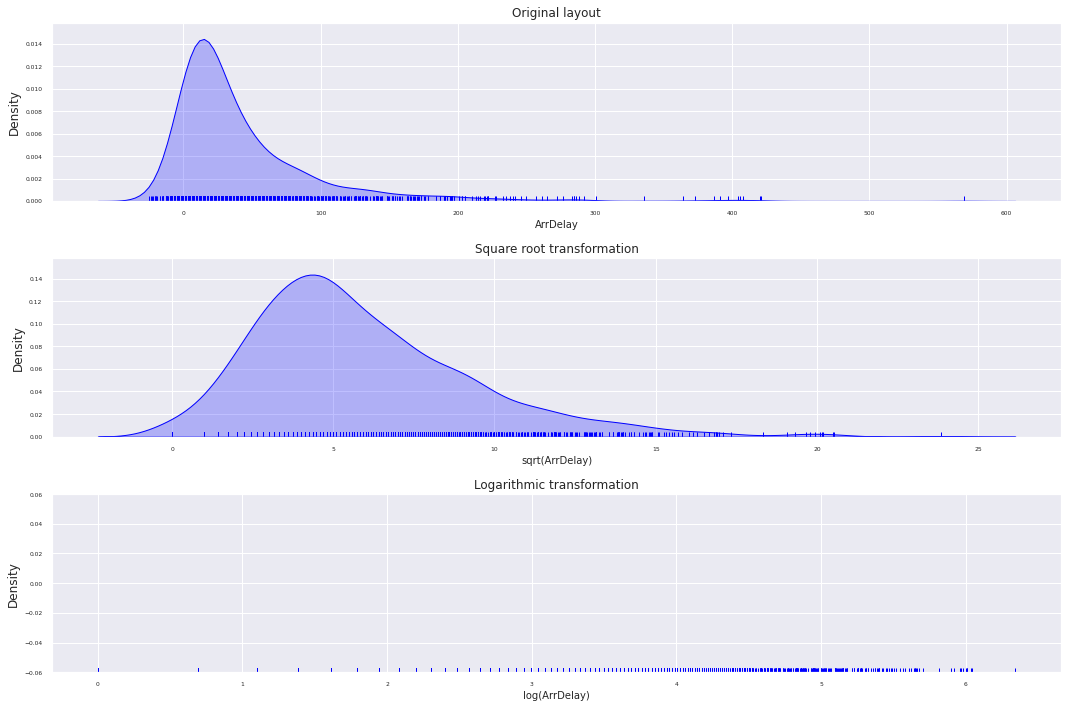

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))
sns.distplot(
    df.ArrDelay,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Original layout", fontsize = 'medium')
axes[0].set_xlabel('ArrDelay', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(df.ArrDelay),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Square root transformation", fontsize = 'medium')
axes[1].set_xlabel('sqrt(ArrDelay)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(df.ArrDelay),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Logarithmic transformation", fontsize = 'medium')
axes[2].set_xlabel('log(ArrDelay)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()
plt.savefig("../reports/figures/Distribution_Response_Variable.png")

## Numerical variables

In [17]:
df.select_dtypes(include=['float64', 'int']).describe()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1937.00,1937.00,1937.00,1937.00,1937.00,1931.00,1937.00,1931.00,1937.00,1931.00,1931.00,1937.00,1937.00,1931.00,1936.00,1937.00,1269.00,1269.00,1269.00,1269.00,1269.00
mean,6.19,15.64,3.98,1525.73,1472.33,1619.84,1642.60,130.87,132.05,106.20,42.47,43.70,749.70,6.69,18.02,0.00,18.38,4.01,15.34,0.04,24.80
std,3.53,8.63,1.95,446.76,421.89,549.55,463.58,70.31,69.97,67.08,56.64,53.68,569.05,4.47,13.47,0.05,42.63,20.65,36.48,0.92,42.24
min,1.00,1.00,1.00,6.00,10.00,2.00,1.00,32.00,30.00,14.00,-25.00,6.00,45.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3.00,8.00,2.00,1216.00,1145.00,1334.00,1345.00,78.00,80.00,56.00,9.00,12.00,334.00,4.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,6.00,16.00,4.00,1550.00,1511.00,1730.00,1715.00,113.00,115.00,88.00,24.00,24.00,594.00,6.00,14.00,0.00,1.00,0.00,2.00,0.00,6.00
75%,9.00,23.00,5.00,1854.00,1820.00,2029.50,2010.00,161.00,161.00,134.00,55.00,53.00,984.00,8.00,21.00,0.00,19.00,0.00,14.00,0.00,33.00
max,12.00,31.00,7.00,2356.00,2359.00,2359.00,2359.00,441.00,419.00,370.00,569.00,571.00,3329.00,44.00,137.00,1.00,569.00,285.00,421.00,25.00,387.00


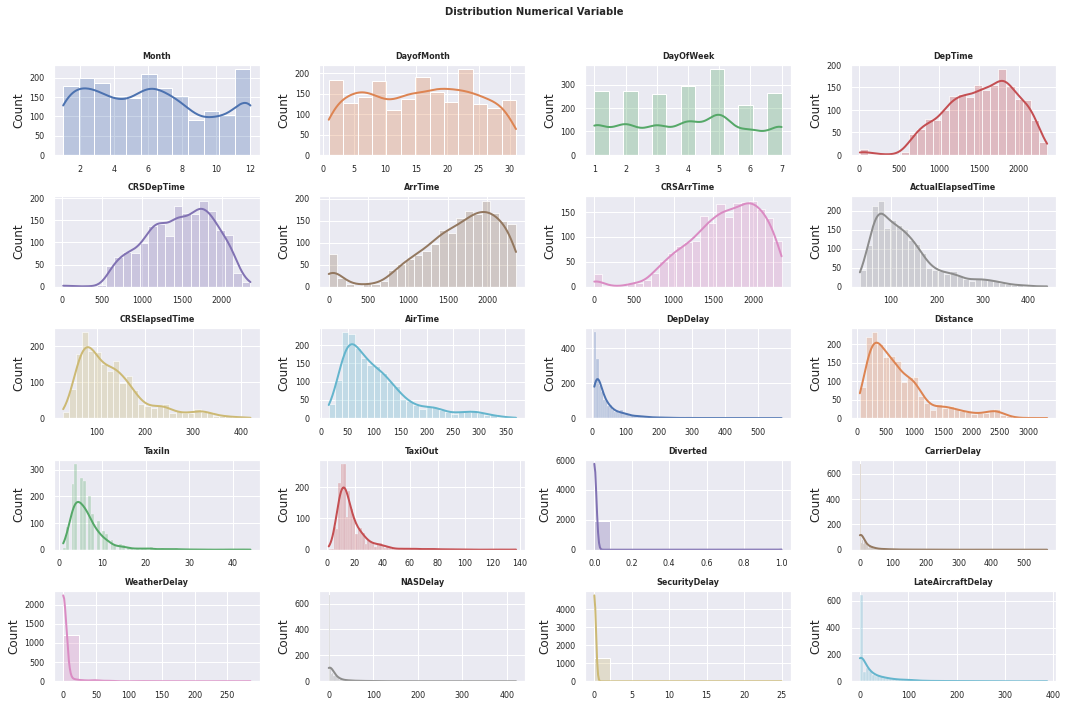

In [18]:
# Distribution graph for each numerical variable
# ==============================================================================
# Adjust number of subplots based on the number of columns

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 10))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('ArrDelay')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 8, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribution Numerical Variable', fontsize = 10, fontweight = "bold")
plt.savefig("../reports/figures/Distribution_Numerical_Variable.png")

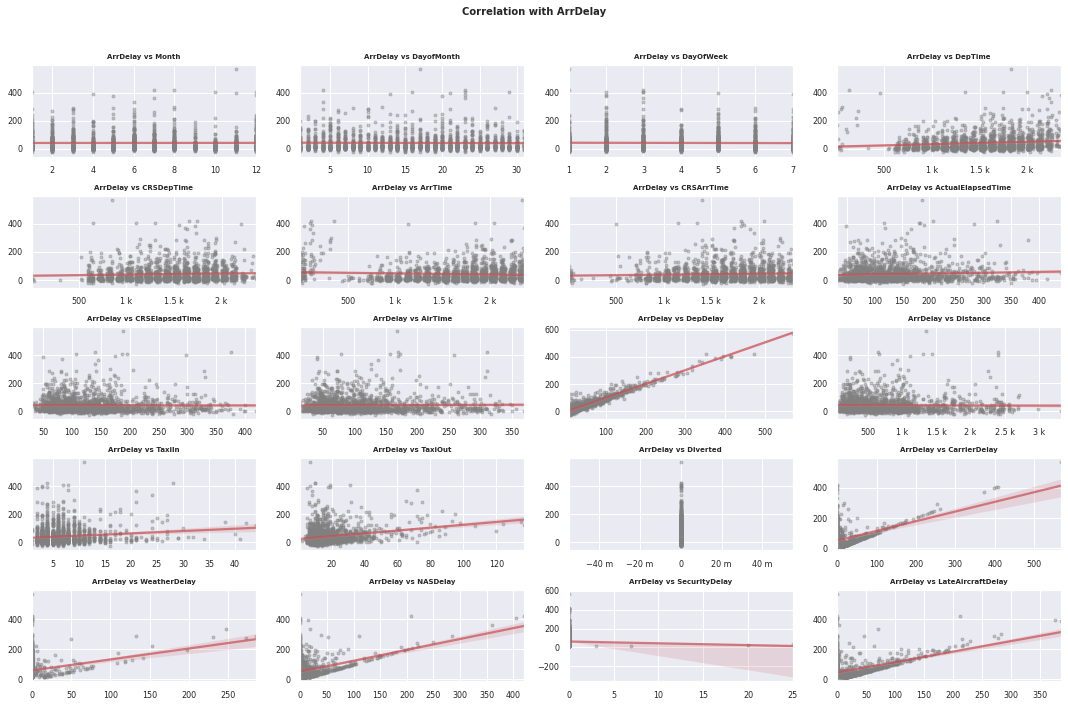

In [19]:
# Distribution graph for each numerical variable
# ==============================================================================
# Adjust number of subplots based on the number of columns
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 10))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('ArrDelay')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = df[colum],
        y           = df['ArrDelay'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"ArrDelay vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

    #if (i-1 >= len(columnas_numeric)-1): break

# Empty axes are removed
"""for i in [8]:
    fig.delaxes(axes[i])"""
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlation with ArrDelay', fontsize = 10, fontweight = "bold")
plt.savefig("../reports/figures/Distribution_Each_Numerical_Variable.png")

### We can observe a strong correlation with DepDelay

## Numerical variables correlation

In [20]:
# Correlation between numeric columns
# ==============================================================================
def tidy_corr_matrix(corr_mat):
    
    # Function to convert a pandas correlation matrix to tidy format
    
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = df.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
195,AirTime,CRSElapsedTime,0.99,0.99
175,CRSElapsedTime,AirTime,0.99,0.99
199,AirTime,Distance,0.98,0.98
257,Distance,AirTime,0.98,0.98
178,CRSElapsedTime,Distance,0.98,0.98
256,Distance,CRSElapsedTime,0.98,0.98
155,ActualElapsedTime,AirTime,0.98,0.98
194,AirTime,ActualElapsedTime,0.98,0.98
173,CRSElapsedTime,ActualElapsedTime,0.97,0.97
154,ActualElapsedTime,CRSElapsedTime,0.97,0.97


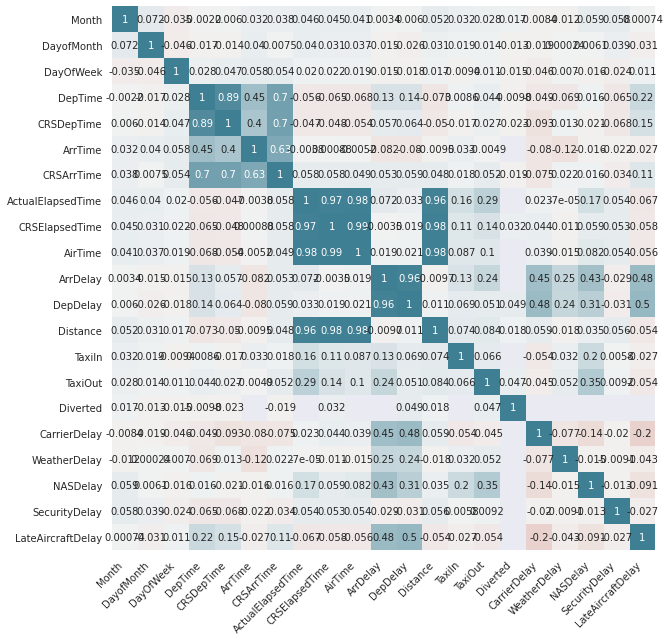

In [21]:
# Heatmap matrix of correlations
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 10},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation = 0,
    horizontalalignment = 'right',
)
ax.tick_params(labelsize = 10)
plt.savefig("../reports/figures/Heatmap_Matrix_Correlations.png")

## Qualitative variables

In [22]:
# Qualitative variables (object type)
# ============================================================================
df.select_dtypes (include = ['object']). describe ()

,UniqueCarrier,Origin,Dest
count,1937,1937,1937
unique,20,180,186
top,WN,ATL,ATL
freq,388,130,102


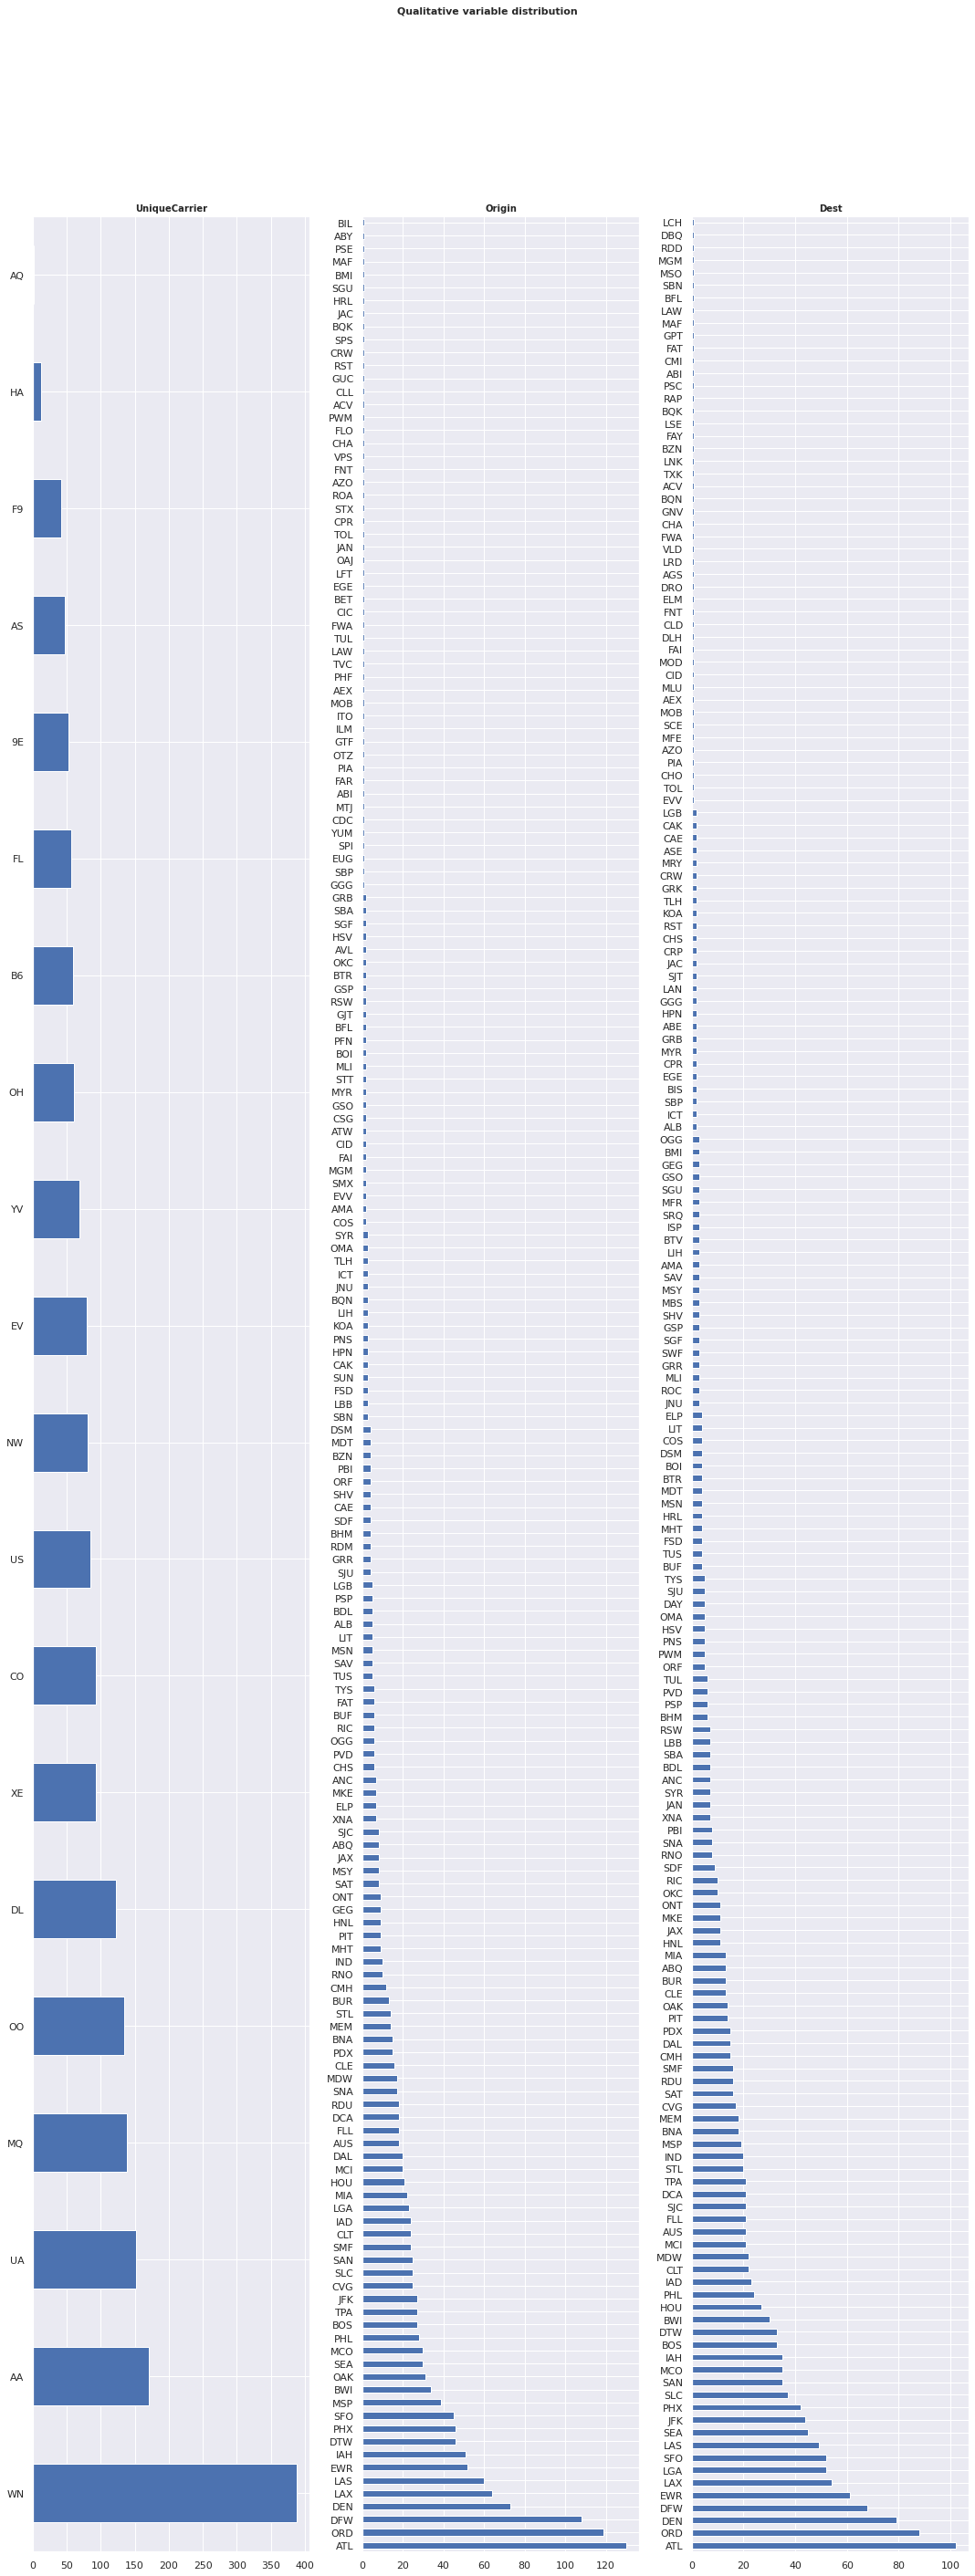

In [23]:
# Graph for each qualitative variable
# ==============================================================================
# Adjust number of subplots based on the number of columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 40))
axes = axes.flat
columnas_object = df.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    df[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 11)
    axes[i].set_xlabel("")

# Empty axes are removed
"""for i in [7, 8]:
    fig.delaxes(axes[i])"""
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Qualitative variable distribution',
             fontsize = 11, fontweight = "bold")
plt.savefig("../reports/figures/Each_Qualtitative_Variable.png")

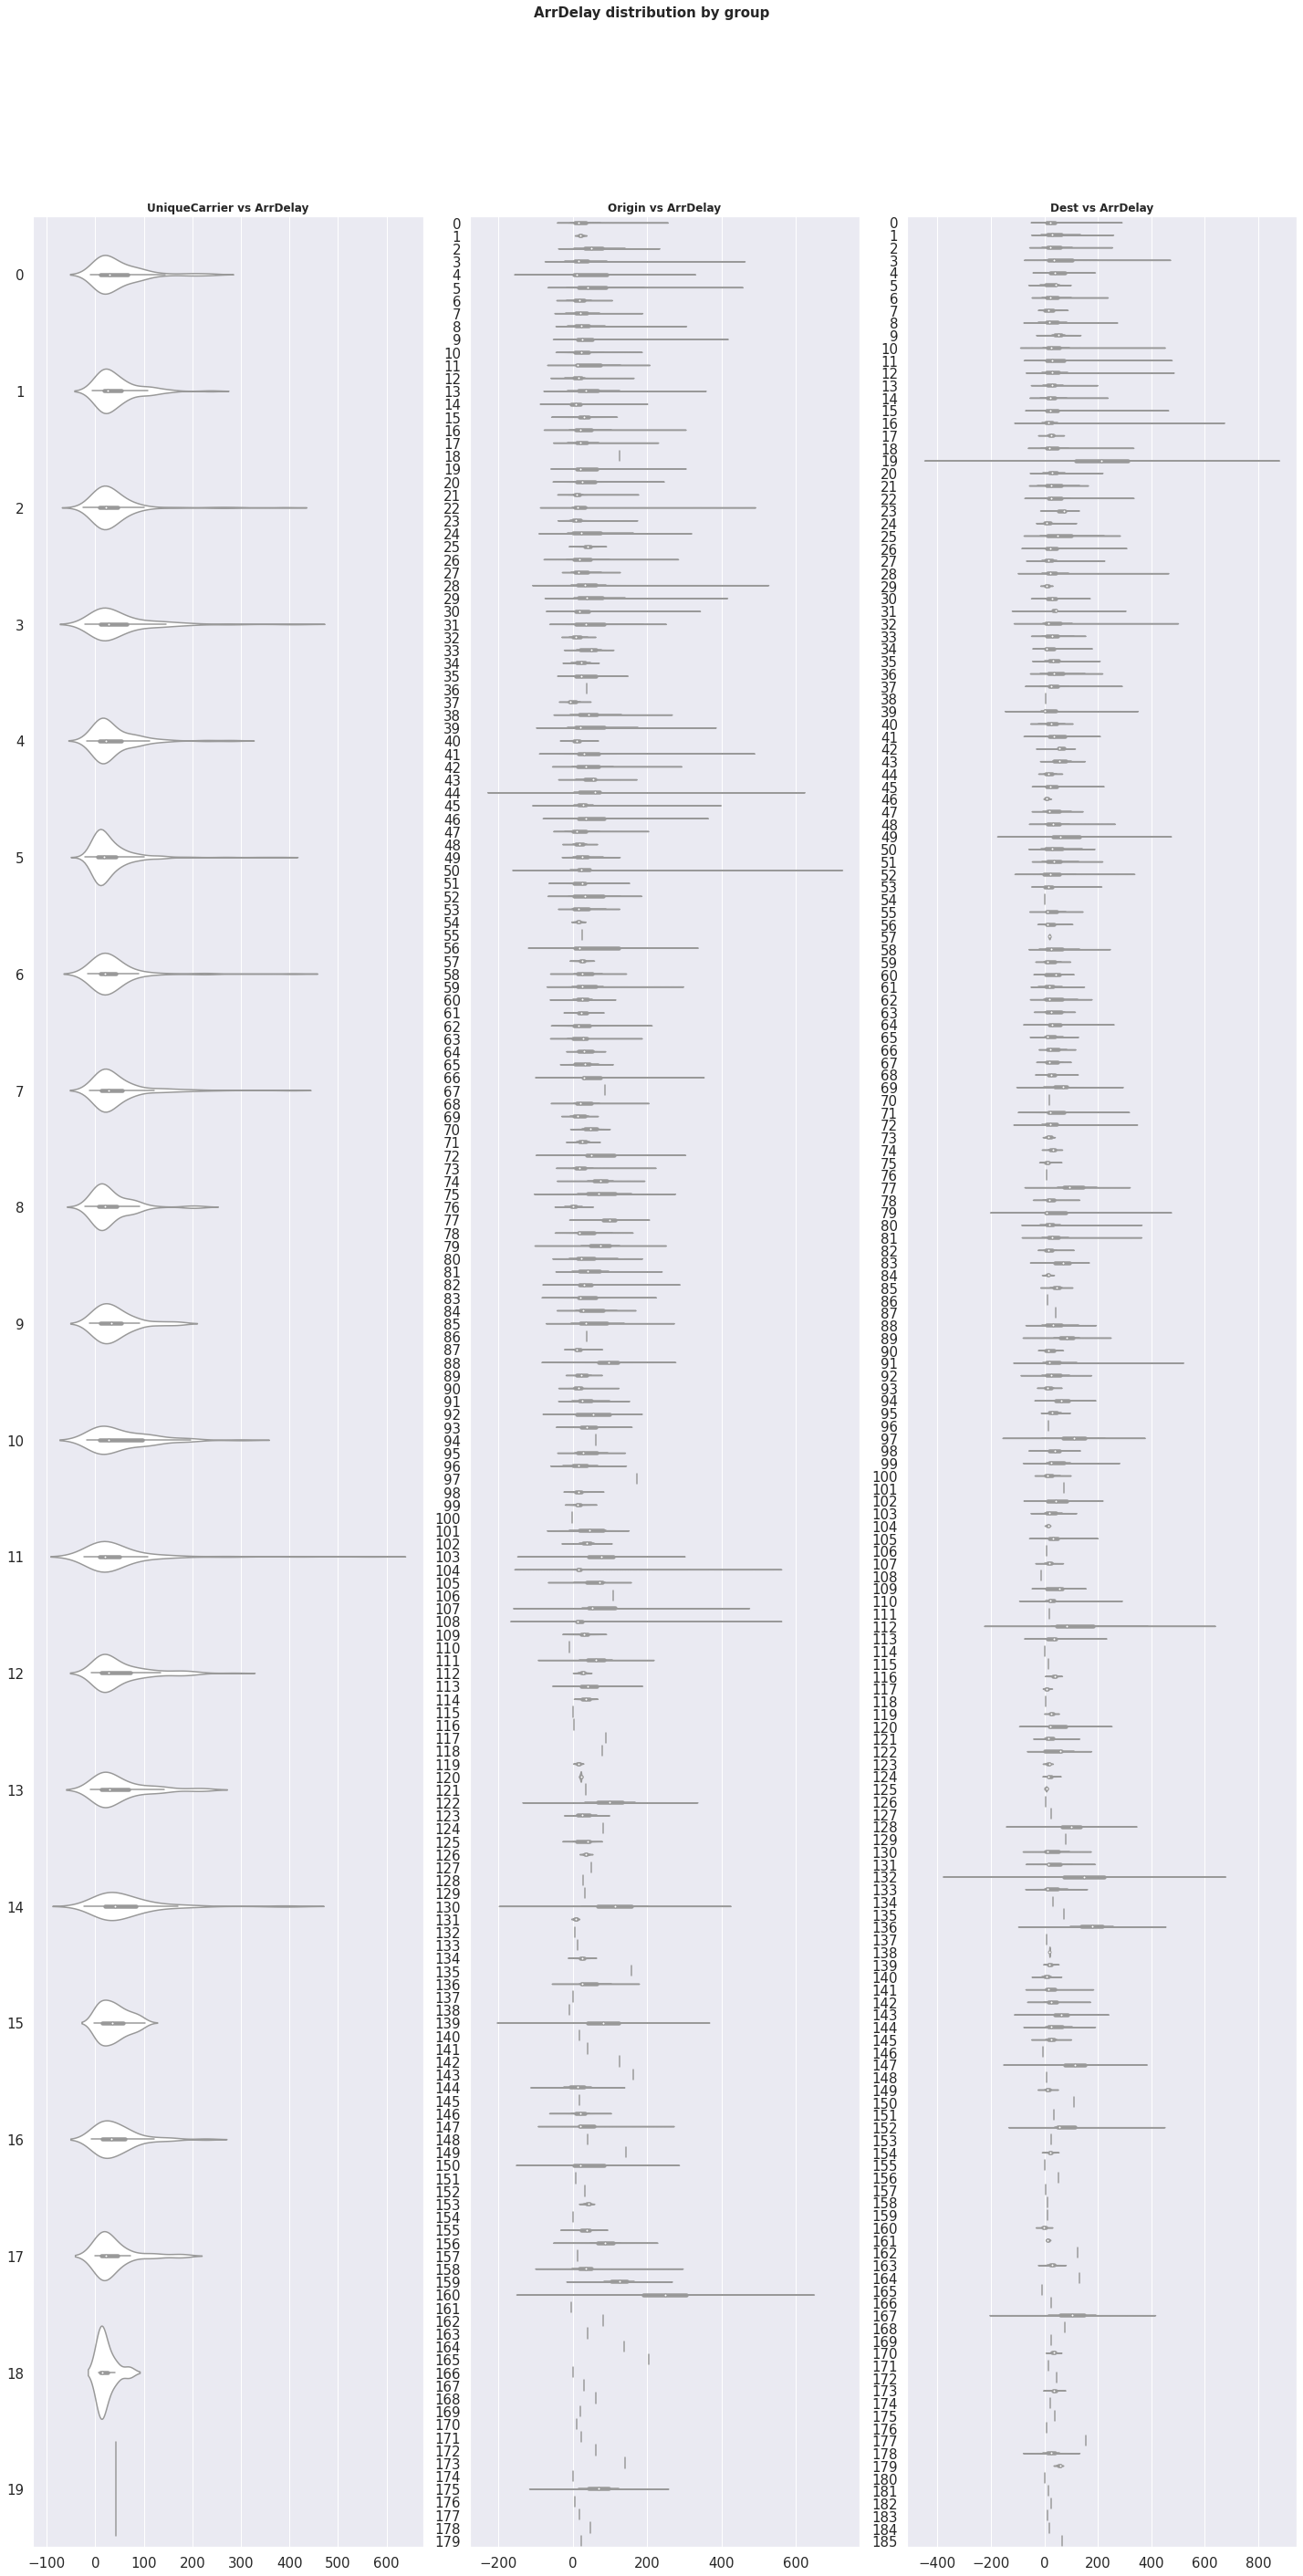

In [24]:
# Graph relationship between the ArrDelay and each qualitative variables
# ==============================================================================
# Adjust number of subplots based on the number of columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 40))
axes = axes.flat
columnas_object = df.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    sns.violinplot(
        x     = 'ArrDelay',
        y     = colum,
        data  = df,
        color = "white",
        ax    = axes[i]
    )
    axes[i].set_title(f"{colum} vs ArrDelay", fontsize = 12, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 15)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Empty axes are removed
"""for i in [7, 8]:
    fig.delaxes(axes[i])"""
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('ArrDelay distribution by group', fontsize = 15, fontweight = "bold")
plt.savefig("../reports/figures/ArrDelay_vs_Qualitative_Variable.png")

## Transform Categorical Variables

In [25]:
# Label encoding 
from sklearn.preprocessing import OrdinalEncoder

geo_encoding=OrdinalEncoder()

geo=['UniqueCarrier','Origin','Dest']

df[geo]=geo_encoding.fit_transform(df[geo])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1937 entries, 32721 to 693767
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              1937 non-null   int64  
 1   DayofMonth         1937 non-null   int64  
 2   DayOfWeek          1937 non-null   int64  
 3   DepTime            1937 non-null   float64
 4   CRSDepTime         1937 non-null   int64  
 5   ArrTime            1931 non-null   float64
 6   CRSArrTime         1937 non-null   int64  
 7   UniqueCarrier      1937 non-null   float64
 8   ActualElapsedTime  1931 non-null   float64
 9   CRSElapsedTime     1937 non-null   float64
 10  AirTime            1931 non-null   float64
 11  ArrDelay           1931 non-null   float64
 12  DepDelay           1937 non-null   float64
 13  Origin             1937 non-null   float64
 14  Dest               1937 non-null   float64
 15  Distance           1937 non-null   int64  
 16  TaxiIn            

## Imputation of missing values

In [27]:
df.isnull().sum().sum()

3371

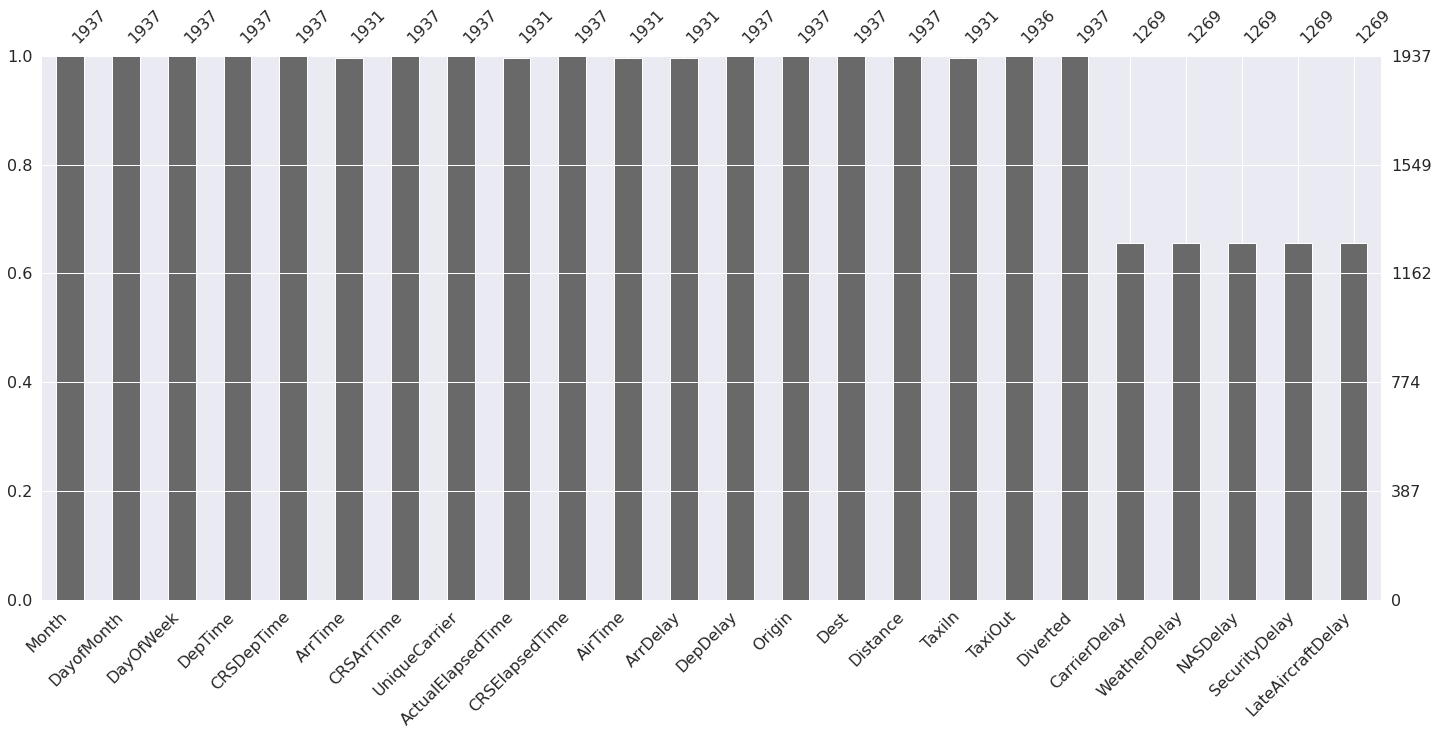

In [28]:
# Missing Values
msno.bar(df);

In [29]:
# Script created for transform missing data
# ===============================================================================
import missing

In [30]:
df[:] = missing.transform(df[:])

In [31]:
df.isnull().sum().sum()

0

In [32]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

In [33]:
df.isna().any()

Month                False
DayofMonth           False
DayOfWeek            False
DepTime              False
CRSDepTime           False
ArrTime              False
CRSArrTime           False
UniqueCarrier        False
ActualElapsedTime    False
CRSElapsedTime       False
AirTime              False
ArrDelay             False
DepDelay             False
Origin               False
Dest                 False
Distance             False
TaxiIn               False
TaxiOut              False
Diverted             False
CarrierDelay         False
WeatherDelay         False
NASDelay             False
SecurityDelay        False
LateAircraftDelay    False
dtype: bool

In [34]:
df.to_csv(path + "processed/DelayedFlightsProcessed.csv", index = False, header = True)

*****************************************************************************
*****************************************************************************
*****************************************************************************

## Divide the data set into training set and test set

In [35]:
df = pd.read_csv(path + 'processed/DelayedFlightsProcessed.csv')

In [36]:
# Matrix
X = df.drop('ArrDelay', axis = 'columns')
# Vector
y = df['ArrDelay']


In [37]:
# Call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 6858)

## Checking if the training set was correcly splitted

In [38]:
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (1549, 23) Target:  (1549,)
Test set - Features:  (388, 23) Target:  (388,)


## Checking  Train, Test partition

In [39]:
print(">>>Train partition")
print("-----------------------")
print(y_train.describe())

>>>Train partition
-----------------------
count   1549.00
mean      42.86
std       56.17
min      -24.00
25%        9.00
50%       24.00
75%       56.00
max      569.00
Name: ArrDelay, dtype: float64


In [40]:
print("Test partition")
print("-----------------------")
print(y_test.describe())

Test partition
-----------------------
count   388.00
mean     40.95
std      58.08
min     -25.00
25%       9.00
50%      24.00
75%      48.50
max     408.00
Name: ArrDelay, dtype: float64


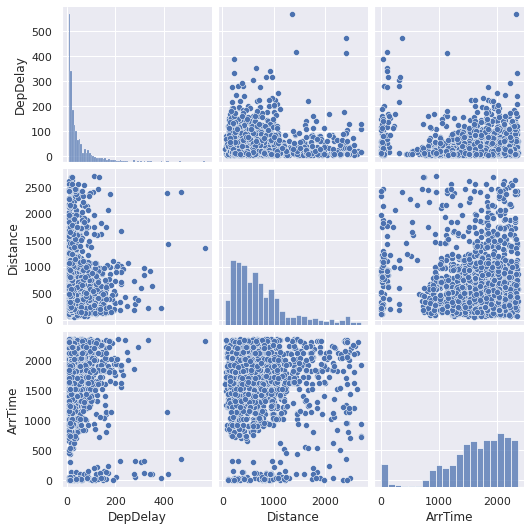

In [41]:
sns.pairplot(X_train[['DepDelay', 'Distance', 'ArrTime']])
plt.savefig("../reports/figures/train_pairplot.png")

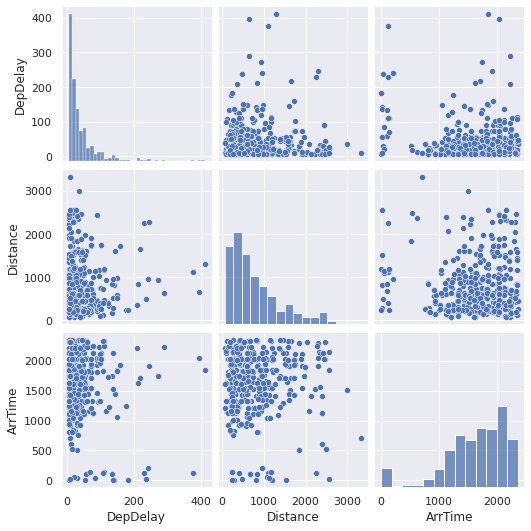

In [42]:
sns.pairplot(X_test[['DepDelay', 'Distance', 'ArrTime']])
plt.savefig("../reports/figures/test_pairplot.png")

In [43]:
X_train.to_csv(path + "interim/X_train.csv", index = False, header = True)
X_test.to_csv(path + "interim/X_test.csv", index = False, header = True)

## Scale Train and Test Data With Standard Scaler

In [44]:
# Import script create for Standar Scaling
# ===============================================================================

import scaling

X_train, X_test = scaling.transform(X_train, X_test, X_train.columns)

In [45]:
X_train

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0.78,0.28,0.01,0.87,1.00,1.12,1.23,1.16,0.15,0.11,0.03,-0.44,-1.39,-0.67,0.02,3.18,-0.45,-0.06,-0.53,-0.23,-0.46,-0.05,-0.14
1,1.62,-0.89,-1.52,-0.48,-0.51,-0.00,-0.05,0.14,0.02,0.20,0.09,-0.61,0.53,-1.28,0.36,-0.16,-0.30,-0.06,-0.00,0.00,-0.00,0.01,0.01
2,-0.91,-0.89,1.03,-1.24,-1.23,0.02,-0.05,0.82,2.02,2.00,2.00,-0.65,0.90,-1.28,2.27,1.18,0.20,-0.06,-0.00,0.00,-0.00,0.01,0.01
3,-1.48,1.33,1.54,-0.82,-0.83,-0.55,-0.85,0.31,-0.72,-0.72,-0.90,-0.26,-1.35,-0.10,-0.99,0.73,0.41,-0.06,-0.53,1.48,-0.53,-0.05,-0.73
4,-0.35,-1.24,-1.52,-0.45,-0.40,0.41,0.40,-1.05,1.06,1.09,1.04,-0.48,0.12,-0.23,1.16,-0.60,0.56,-0.06,-0.53,-0.23,-0.53,-0.05,-0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544,0.49,-0.89,0.52,0.70,0.30,0.93,0.56,0.65,-0.23,-0.11,-0.17,2.20,0.08,-0.86,-0.19,-0.16,-0.30,-0.06,-0.53,-0.23,-0.53,-0.05,3.77
1545,1.62,-1.00,1.54,-0.15,-0.07,0.04,-0.02,0.99,-0.37,-0.37,-0.27,-0.63,-1.23,1.28,-0.44,-0.83,-0.30,-0.06,-0.00,0.00,-0.00,0.01,0.01
1546,-0.35,1.68,0.52,0.04,0.06,0.16,-0.03,-0.71,-0.64,-0.65,-0.58,-0.07,-0.11,-1.61,-0.65,0.51,-0.59,-0.06,0.62,-0.23,-0.53,-0.05,-0.73
1547,-1.48,0.98,0.01,-1.74,-1.77,-1.20,-1.52,0.99,0.16,-0.01,0.12,-0.58,-0.98,0.27,0.12,0.29,0.13,-0.06,-0.16,-0.23,-0.15,-0.05,-0.73


In [46]:
X_test

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1.06,1.80,0.52,0.06,0.14,0.06,0.02,-1.05,-1.00,-0.81,-0.91,-0.54,-0.15,0.61,-0.78,-0.60,-0.45,-0.06,-0.00,0.00,-0.00,0.01,0.01
1,-0.91,1.10,-1.01,-1.53,-1.58,-1.26,-1.67,1.33,-1.14,-1.07,-1.17,-0.26,0.74,0.46,-1.08,-1.05,0.20,-0.06,0.16,-0.23,-0.53,-0.05,-0.73
2,-1.20,-0.89,0.52,-0.43,-0.39,-0.33,-0.47,0.48,-0.87,-0.81,-0.85,-0.41,-1.21,1.46,-0.70,0.51,-0.45,-0.06,-0.53,-0.23,-0.53,-0.05,-0.22
3,0.21,0.75,-1.01,0.69,0.81,0.74,0.84,-1.74,1.50,1.81,1.74,-0.54,0.74,1.15,1.77,-0.83,-0.52,-0.06,-0.00,0.00,-0.00,0.01,0.01
4,1.62,0.40,0.52,-1.25,-1.68,-0.83,-1.49,0.99,0.79,0.50,0.99,1.41,1.63,-1.76,0.35,-0.16,-0.73,-0.06,-0.42,-0.23,0.12,-0.05,2.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,-1.20,-0.89,0.52,0.22,0.17,0.52,0.41,0.65,-0.36,-0.33,-0.26,-0.13,0.74,-1.09,-0.25,-0.16,-0.52,-0.06,-0.53,0.48,-0.53,-0.05,-0.08
384,-0.63,-1.47,0.01,0.18,0.19,0.23,0.20,-1.22,-0.39,-0.45,-0.46,-0.63,-0.17,-1.42,-0.58,0.06,0.20,-0.06,-0.00,0.00,-0.00,0.01,0.01
385,-0.07,-1.12,0.52,-0.00,-0.07,-0.02,-0.26,0.48,-1.27,-1.35,-1.25,-0.07,0.51,0.44,-1.19,-0.60,-0.23,-0.06,0.62,-0.23,-0.40,-0.05,-0.73
386,-0.07,-1.12,0.52,0.42,0.53,0.74,0.67,0.99,0.08,-0.23,-0.18,-0.54,0.34,-1.28,-0.23,-0.83,1.49,-0.06,-0.50,-0.23,0.16,-0.05,-0.31


In [47]:
X_train.describe().round(3)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1549.00,1549.00,1549.00,1549.00,1549.00,1549.00,1549.00,1549.00,1549.00,1549.00,1549.00,1549.00,1549.00,1549.00,1549.00,1549.00,1549.00,1549.00,1549.00,1549.00,1549.00,1549.00,1549.00
mean,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.48,-1.70,-1.52,-3.34,-3.43,-2.91,-3.50,-1.91,-1.42,-1.47,-1.39,-0.71,-1.79,-1.80,-1.25,-1.27,-1.24,-0.06,-0.53,-0.23,-0.53,-0.05,-0.73
25%,-0.92,-0.89,-1.01,-0.69,-0.77,-0.51,-0.64,-0.88,-0.75,-0.74,-0.74,-0.59,-0.81,-0.86,-0.72,-0.60,-0.59,-0.06,-0.53,-0.23,-0.53,-0.05,-0.73
50%,-0.07,0.05,0.01,0.07,0.10,0.20,0.16,0.31,-0.24,-0.23,-0.26,-0.37,0.08,0.02,-0.26,-0.16,-0.30,-0.06,-0.00,-0.23,-0.01,-0.05,0.01
75%,0.78,0.87,0.52,0.73,0.81,0.75,0.79,0.99,0.42,0.43,0.38,0.17,0.74,0.84,0.41,0.28,0.20,-0.06,-0.00,0.00,-0.00,0.01,0.01
max,1.62,1.80,1.54,1.83,2.08,1.34,1.53,1.33,4.13,4.21,3.73,9.90,1.92,1.74,3.54,7.85,8.51,17.57,15.82,16.66,14.02,37.87,10.71


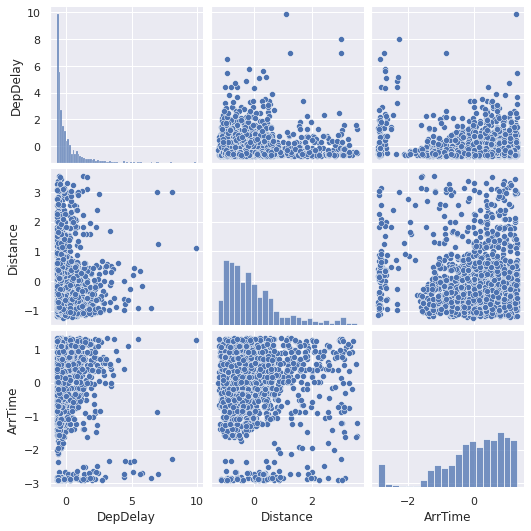

In [48]:
sns.pairplot(X_train[['DepDelay', 'Distance', 'ArrTime']])
plt.savefig("../reports/figures/X_train_Stand_pairplot.png")

In [49]:
X_test.describe().round(3)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00
mean,-0.08,0.03,-0.00,0.02,-0.01,0.02,0.01,-0.00,0.08,0.11,0.10,0.00,-0.13,-0.07,0.11,-0.04,-0.08,-0.06,-0.01,0.02,-0.02,0.06,0.03
std,0.96,1.03,0.99,0.91,0.94,0.94,0.94,1.00,1.08,1.09,1.09,1.04,0.99,0.98,1.11,0.96,0.80,0.00,0.96,0.95,1.10,1.56,1.05
min,-1.48,-1.70,-1.52,-3.32,-2.05,-2.91,-3.50,-1.91,-1.39,-1.44,-1.39,-0.71,-1.76,-1.80,-1.20,-1.27,-0.95,-0.06,-0.53,-0.23,-0.53,-0.05,-0.73
25%,-0.92,-0.89,-1.01,-0.64,-0.76,-0.48,-0.60,-0.88,-0.77,-0.74,-0.74,-0.58,-0.85,-0.86,-0.74,-0.60,-0.52,-0.06,-0.53,-0.23,-0.53,-0.05,-0.73
50%,-0.07,-0.01,0.01,0.04,-0.04,0.18,0.03,0.31,-0.20,-0.22,-0.25,-0.35,-0.15,-0.10,-0.23,-0.16,-0.30,-0.06,-0.00,-0.23,-0.00,-0.05,0.01
75%,0.49,0.98,0.52,0.71,0.79,0.73,0.76,0.99,0.56,0.57,0.59,0.16,0.69,0.75,0.60,0.28,0.05,-0.06,-0.00,0.00,-0.00,0.01,0.01
max,1.62,1.80,1.54,1.81,1.95,1.33,1.53,1.33,4.51,3.93,4.04,6.92,1.90,1.72,4.67,8.30,4.78,-0.06,11.20,13.40,13.50,30.29,10.39


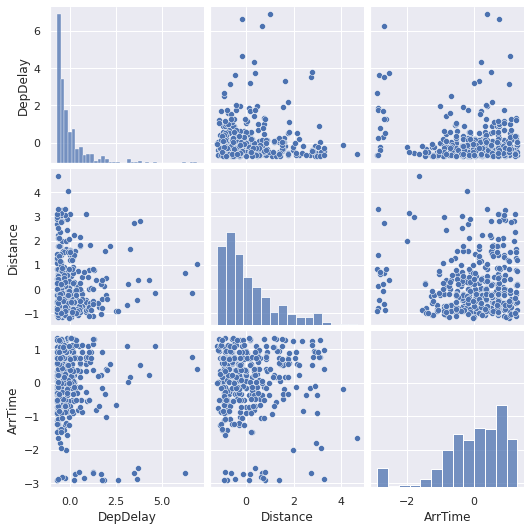

In [50]:
sns.pairplot(X_test[['DepDelay', 'Distance', 'ArrTime']])
plt.savefig("../reports/figures/X_test_Stand_pairplot.png")

In [51]:
X_train.to_csv(path + "interim/X_train_Stand.csv", index = False, header = True)
X_test.to_csv(path + "interim/X_test_Stand.csv", index = False, header = True)

##  Automate fit and evaluate all the models with LazyRegressor

### Lazy Predict helps build a lot of basic models without much code and helps understand which models works better without any parameter tuning

https://lazypredict.readthedocs.io/en/latest/readme.html

In [52]:
# LazyRegressor Instance and fiting data

reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

models, predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:06<00:00,  6.17it/s]


### Check which model did better on the dataset

In [53]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RANSACRegressor,1.00,1.00,0.00,0.04
LinearSVR,1.00,1.00,0.00,0.01
HuberRegressor,1.00,1.00,0.17,0.15
PassiveAggressiveRegressor,1.00,1.00,0.69,0.02
TransformedTargetRegressor,0.99,1.00,4.06,0.01
LinearRegression,0.99,1.00,4.06,0.01
Lars,0.99,1.00,4.06,0.02
BayesianRidge,0.99,1.00,4.06,0.03
Ridge,0.99,0.99,4.23,0.01


- Visualize Predictions with LazzyRegressor

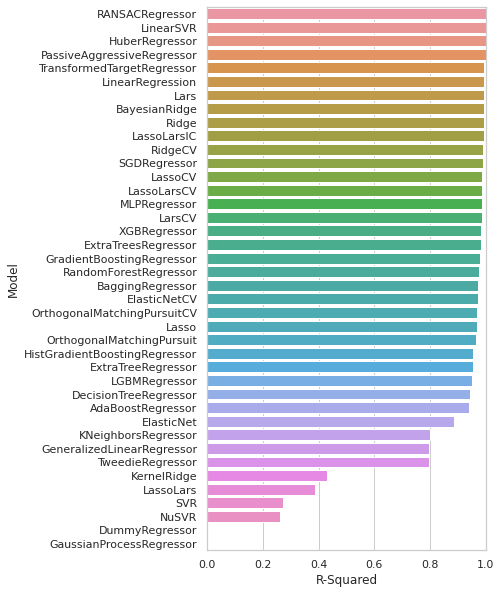

In [54]:
predictions["R-Squared"] = [0 if i < 0 else i for i in predictions.iloc[:,0] ]
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions.index, x="R-Squared", data=predictions)
ax.set(xlim=(0, 1))
plt.savefig("../reports/figures/LazzyRegressor_Models.png")

### Check the predictions for the models 

In [55]:
predictions.head(10)

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RANSACRegressor,1.00,1.00,0.00,0.04
LinearSVR,1.00,1.00,0.00,0.01
HuberRegressor,1.00,1.00,0.17,0.15
PassiveAggressiveRegressor,1.00,1.00,0.69,0.02
TransformedTargetRegressor,0.99,0.99,4.06,0.01
LinearRegression,0.99,0.99,4.06,0.01
Lars,0.99,0.99,4.06,0.02
BayesianRidge,0.99,0.99,4.06,0.03
Ridge,0.99,0.99,4.23,0.01



## Checking Score

In [56]:
# Evaluation Function
def rmse(model, y_test, y_pred, X_train, y_train):
    r_squared = model.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return str(r_squared), str(rmse)

In [57]:
# Create model line scatter plot
def scatter_plot(y_test, y_pred, model_name):
    plt.figure(figsize=(10,6))
    sns.residplot(y_test, y_pred, lowess=True, color='#4682b4',
              line_kws={'lw': 2, 'color': 'r'})
    plt.title(str('ArrDelay vs Residuals for \n' + model_name), fontsize=16)
    plt.xlabel('ArrDelay',fontsize=16)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.savefig("../reports/figures/%s.png" % model_name)
    plt.show()

In [58]:
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingRegressor

In [59]:
# Histogram-based Gradient Boosting Regression Tree
hist = HistGradientBoostingRegressor()
hist.fit(X_train, y_train)
y_pred = hist.predict(X_test)

In [60]:
r2_Gradient, rmse_Gradient = rmse(hist, y_test, y_pred, X_train, y_train)

In [61]:
print(r'R-Squared: %s' % r2_Gradient)
print(r'Mean Squared Error: %s' % rmse_Gradient)

R-Squared: 0.9561458911207977
Mean Squared Error: 12.147708579096497


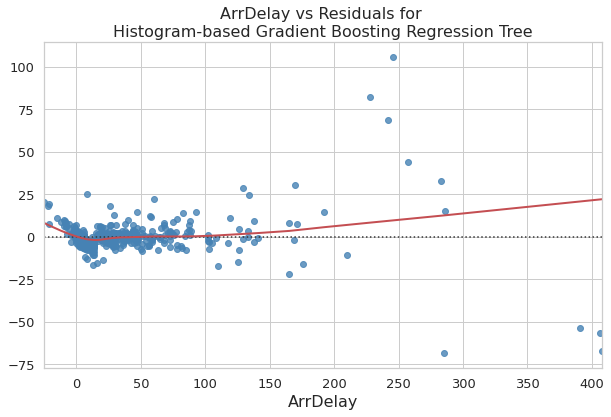

In [62]:
scatter_plot(y_test, y_pred, 'Histogram-based Gradient Boosting Regression Tree')

## Check Models to adjust parameter

In [63]:
print(models.head(15))

                            Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                      
RANSACRegressor                           1.00       1.00  0.00        0.04
LinearSVR                                 1.00       1.00  0.00        0.01
HuberRegressor                            1.00       1.00  0.17        0.15
PassiveAggressiveRegressor                1.00       1.00  0.69        0.02
TransformedTargetRegressor                0.99       0.99  4.06        0.01
LinearRegression                          0.99       0.99  4.06        0.01
Lars                                      0.99       0.99  4.06        0.02
BayesianRidge                             0.99       0.99  4.06        0.03
Ridge                                     0.99       0.99  4.23        0.01
LassoLarsIC                               0.99       0.99  5.04        0.02
RidgeCV                                   0.99       0.99  5.47        0.04
SGDRegressor

## Huber Regressor

In [64]:
# random search linear regression model on the dataset


from sklearn.linear_model import HuberRegressor


# define model
model = HuberRegressor()
# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=6858)
# define search space
params = dict()
params['epsilon'] = loguniform(1e-5, 100)
params['alpha'] = loguniform(1e-5, 100)
params['warm_start'] = [True, False]
params['fit_intercept'] = [True, False]
params['tol'] = loguniform(1e-05, 100)
# define search
search = RandomizedSearchCV(model, params, n_iter=500, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv,random_state=6858)
# execute search
result = search.fit(X, y)
# summarize result
Huber_Best_Score = result.best_score_
print('Best Score: %s' % Huber_Best_Score)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -3.5312014290360043
Best Hyperparameters: {'alpha': 0.08717702982440284, 'epsilon': 36.30422037045819, 'fit_intercept': False, 'tol': 0.00015695516389867273, 'warm_start': False}


In [65]:
# Histogram-based HuberRegressor
hist = HuberRegressor()
hist.fit(X_train, y_train)
y_pred = hist.predict(X_test)

In [66]:
r2_Huber, rmse_Huber = rmse(hist, y_test, y_pred, X_train, y_train)


In [67]:
print(r'R-Squared: ',r2_Huber)
print(r'Mean Squared Error: ',rmse_Huber)

R-Squared:  0.9999917768121499
Mean Squared Error:  0.1663448367542621


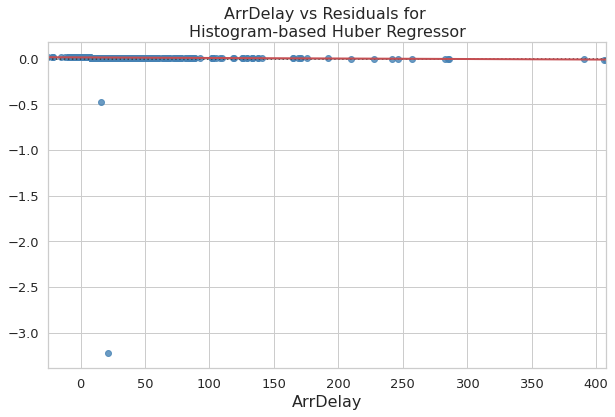

In [68]:
scatter_plot(y_test, y_pred, 'Histogram-based Huber Regressor')

## Lars 

In [69]:
# random search Lars Regression model on the dataset

from sklearn.linear_model import Lars


# define model
model = Lars()
# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=6858)
# define search space
params = dict()
params['fit_intercept'] = [True, False]
params['verbose'] = [True, False]
params['normalize'] = [True, False]
params['precompute'] = [True, False]
params['n_nonzero_coefs'] = [500]
# define search
search = RandomizedSearchCV(model, params, n_iter=500, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, random_state=6858)
# execute search
result = search.fit(X, y)
# summarize result
Lars_Best_Score = result.best_score_
print('Best Score: %s' % Lars_Best_Score)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -24.975432867973502
Best Hyperparameters: {'verbose': True, 'precompute': False, 'normalize': False, 'n_nonzero_coefs': 500, 'fit_intercept': True}


In [70]:
# Histogram-based Lars Regressor
hist = Lars()
hist.fit(X_train, y_train)
y_pred = hist.predict(X_test)

In [71]:
r2_Lars, rmse_Lars = rmse(hist, y_test, y_pred, X_train, y_train)


In [72]:
print(r'R-Squared: ',r2_Lars)
print(r'Mean Squared Error: ',rmse_Lars)

R-Squared:  0.9951008247926728
Mean Squared Error:  4.060230648191832


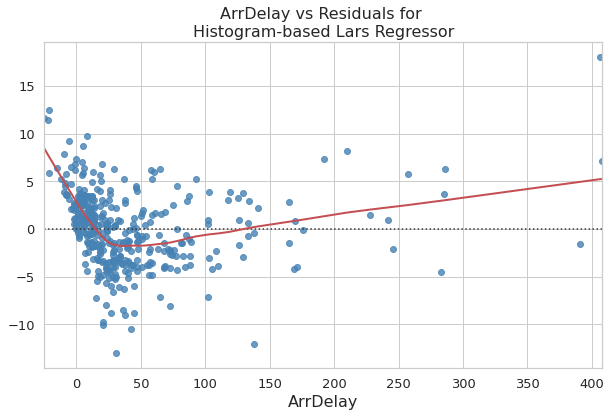

In [73]:
scatter_plot(y_test, y_pred, 'Histogram-based Lars Regressor')

## Ridge

In [74]:
# random search Ridge Regressor model on the dataset

from sklearn.linear_model import Ridge

# define model
model = Ridge()
# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=6858)
# define search space
params = dict()
params['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
params['alpha'] = loguniform(1e-5, 100)
params['fit_intercept'] = [True, False]
params['normalize'] = [True, False]
params['copy_X'] = [True, False]
params['max_iter'] = [None]
params['tol'] = [1e-3]
# define search
search = RandomizedSearchCV(model, params, n_iter=500, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, random_state=6858)
# execute search
result = search.fit(X, y)
# summarize result
Ridge_Best_Score = result.best_score_
print('Best Score: %s' % Ridge_Best_Score)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -3.1621742336746306
Best Hyperparameters: {'alpha': 1.8067471868249012e-05, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'solver': 'lsqr', 'tol': 0.001}


In [75]:
# Histogram-based Ridge Regressor
hist = Ridge()
hist.fit(X_train, y_train)
y_pred = hist.predict(X_test)

In [76]:
r2_Ridge, rmse_Ridge = rmse(hist, y_test, y_pred, X_train, y_train)


In [77]:
print(r'R-Squared: ',r2_Ridge)
print(r'Mean Squared Error: ',rmse_Ridge)

R-Squared:  0.9946846841267296
Mean Squared Error:  4.229156521281789


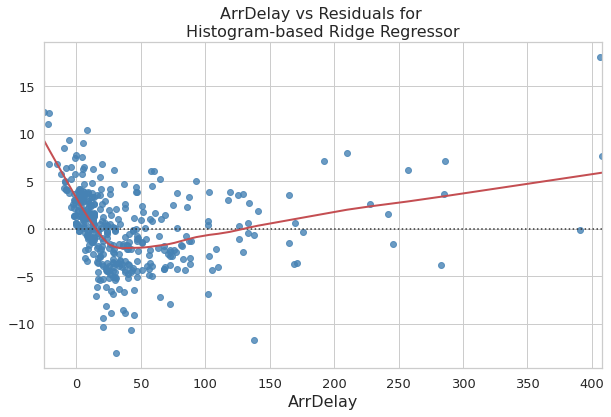

In [78]:
scatter_plot(y_test, y_pred, 'Histogram-based Ridge Regressor')

## OrthogonalMatchingPursuitCV

In [79]:
from sklearn.linear_model import OrthogonalMatchingPursuitCV


# define model
model = OrthogonalMatchingPursuitCV()
# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=6858)
# define search space
params = dict()
params['copy'] = [True, False]
params['fit_intercept'] = [True, False]
params['normalize'] = [True, False]
params['max_iter'] = [None]
# define search
search = RandomizedSearchCV(model, params, n_iter=500, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, random_state=6858)
# execute search
result = search.fit(X, y)
# summarize result
Orthogonal_Best_Score = result.best_score_
print('Best Score: %s' % Orthogonal_Best_Score)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -7.9043754025708495
Best Hyperparameters: {'normalize': False, 'max_iter': None, 'fit_intercept': True, 'copy': True}


In [80]:
# Histogram-based OrthogonalMatchingPursuitCV Regressor
hist = OrthogonalMatchingPursuitCV()
hist.fit(X_train, y_train)
y_pred = hist.predict(X_test)

In [81]:
r2_Orthogonal, rmse_Orthogonal = rmse(hist, y_test, y_pred, X_train, y_train)


In [82]:
print(r'R-Squared: ',r2_Orthogonal)
print(r'Mean Squared Error: ',rmse_Orthogonal)

R-Squared:  0.9710152175205112
Mean Squared Error:  9.875844479381763


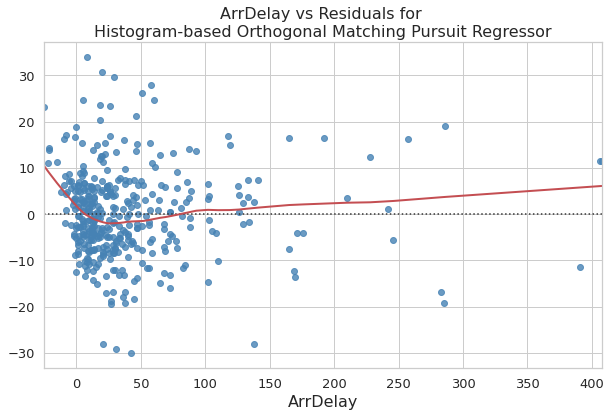

In [83]:
scatter_plot(y_test, y_pred, 'Histogram-based Orthogonal Matching Pursuit Regressor')

In [84]:
measure_eval = pd.DataFrame({'Measure': ['R2', 'RMSE', 'Best Score'], 
                             'Gradient_Bosting': [r2_Gradient, rmse_Gradient, ''],
                             'Huber Regressor':[r2_Huber, rmse_Huber, Huber_Best_Score],
                             'Lars': [r2_Lars, rmse_Lars, Lars_Best_Score],
                             'Ridge': [r2_Ridge, rmse_Ridge, Ridge_Best_Score], 
                             'Ortogonal': [r2_Orthogonal, rmse_Orthogonal, Orthogonal_Best_Score]
                            })

In [85]:
measure_eval

,Measure,Gradient_Bosting,Huber Regressor,Lars,Ridge,Ortogonal
0,R2,0.9561458911207977,0.9999917768121499,0.9951008247926728,0.9946846841267296,0.9710152175205112
1,RMSE,12.147708579096497,0.1663448367542621,4.060230648191832,4.229156521281789,9.875844479381763
2,Best Score,,-3.53,-24.98,-3.16,-7.90


## We use another type of scaling to see if the results change

In [86]:
df = pd.read_csv(path + 'processed/DelayedFlightsProcessed.csv')

In [87]:
# Matrix
X = df.drop(['DepDelay'], axis = 'columns')
# Vector
y = df['ArrDelay']

In [88]:
# Call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 6858)

In [89]:
# Import script create for MinMax Scaling
# ===============================================================================

import scaling

X_train, X_test = scaling.transform_MinMax(X_train, X_test, X_train.columns)

In [90]:
X_train

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0.73,0.57,0.50,0.81,0.80,0.95,0.94,0.95,0.28,0.28,0.28,0.08,0.11,0.32,0.26,0.49,0.08,0.00,0.00,0.00,0.00,0.00,0.05
1,1.00,0.23,0.00,0.55,0.53,0.69,0.69,0.63,0.26,0.29,0.29,0.04,0.63,0.15,0.34,0.12,0.10,0.00,0.03,0.01,0.04,0.00,0.06
2,0.18,0.23,0.83,0.41,0.40,0.69,0.69,0.84,0.62,0.61,0.66,0.06,0.73,0.15,0.73,0.27,0.15,0.00,0.03,0.01,0.04,0.00,0.06
3,0.00,0.87,1.00,0.49,0.47,0.55,0.53,0.68,0.13,0.13,0.10,0.09,0.12,0.48,0.05,0.22,0.17,0.00,0.00,0.10,0.00,0.00,0.00
4,0.36,0.13,0.00,0.56,0.55,0.78,0.77,0.26,0.45,0.45,0.47,0.07,0.51,0.44,0.50,0.07,0.18,0.00,0.00,0.00,0.00,0.00,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544,0.64,0.23,0.67,0.78,0.68,0.90,0.81,0.79,0.21,0.24,0.24,0.30,0.50,0.26,0.22,0.12,0.10,0.00,0.00,0.00,0.00,0.00,0.39
1545,1.00,0.20,1.00,0.62,0.61,0.69,0.69,0.89,0.19,0.19,0.22,0.06,0.15,0.87,0.17,0.05,0.10,0.00,0.03,0.01,0.04,0.00,0.06
1546,0.36,0.97,0.67,0.65,0.63,0.72,0.69,0.37,0.14,0.14,0.16,0.11,0.45,0.05,0.12,0.20,0.07,0.00,0.07,0.00,0.00,0.00,0.00
1547,0.00,0.77,0.50,0.31,0.30,0.40,0.39,0.89,0.28,0.26,0.29,0.08,0.22,0.58,0.28,0.17,0.14,0.00,0.02,0.00,0.03,0.00,0.00


In [91]:
X_test

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0.82,1.00,0.67,0.66,0.55,0.70,0.70,0.26,0.07,0.12,0.09,0.06,0.44,0.68,0.07,0.07,0.09,0.00,0.05,0.02,0.04,0.00,0.07
1,0.18,0.80,0.17,0.35,0.12,0.39,0.36,1.00,0.04,0.07,0.04,0.11,0.68,0.64,0.02,0.02,0.20,0.00,0.06,0.00,0.00,0.00,0.00
2,0.09,0.23,0.67,0.56,0.41,0.61,0.60,0.74,0.09,0.12,0.10,0.10,0.15,0.92,0.08,0.19,0.09,0.00,0.00,0.00,0.00,0.00,0.05
3,0.55,0.70,0.17,0.78,0.72,0.86,0.86,0.05,0.49,0.61,0.58,0.04,0.68,0.84,0.51,0.05,0.08,0.00,0.05,0.02,0.04,0.00,0.07
4,1.00,0.60,0.67,0.40,0.09,0.49,0.40,0.89,0.37,0.36,0.44,0.38,0.93,0.01,0.26,0.12,0.04,0.00,0.01,0.00,0.05,0.00,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,0.09,0.23,0.67,0.69,0.55,0.81,0.78,0.79,0.17,0.21,0.21,0.14,0.68,0.20,0.16,0.12,0.08,0.00,0.00,0.05,0.00,0.00,0.06
384,0.27,0.07,0.50,0.68,0.56,0.74,0.74,0.21,0.17,0.18,0.17,0.09,0.44,0.11,0.10,0.14,0.20,0.00,0.05,0.02,0.04,0.00,0.07
385,0.45,0.17,0.67,0.65,0.49,0.68,0.64,0.74,0.02,0.02,0.03,0.16,0.62,0.64,0.00,0.07,0.12,0.00,0.10,0.00,0.01,0.00,0.00
386,0.45,0.17,0.67,0.73,0.65,0.86,0.83,0.89,0.25,0.23,0.22,0.14,0.58,0.15,0.17,0.05,0.43,0.00,0.00,0.00,0.05,0.00,0.04


In [92]:
X_train.describe().round(3)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1549.00,1549.00,1549.00,1549.00,1549.00,1549.00,1549.00,1549.00,1549.00,1549.00,1549.00,1549.00,1549.00,1549.00,1549.00,1549.00,1549.00,1549.00,1549.00,1549.00,1549.00,1549.00,1549.00
mean,0.48,0.49,0.50,0.65,0.62,0.69,0.70,0.59,0.26,0.26,0.27,0.11,0.48,0.51,0.26,0.14,0.13,0.00,0.03,0.01,0.04,0.00,0.06
std,0.32,0.29,0.33,0.19,0.18,0.23,0.20,0.31,0.18,0.18,0.20,0.10,0.27,0.28,0.21,0.11,0.10,0.06,0.06,0.06,0.07,0.03,0.09
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.18,0.23,0.17,0.51,0.48,0.56,0.57,0.32,0.12,0.13,0.12,0.06,0.26,0.27,0.11,0.07,0.07,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.46,0.50,0.50,0.66,0.64,0.73,0.73,0.68,0.21,0.22,0.22,0.08,0.50,0.51,0.21,0.12,0.10,0.00,0.03,0.00,0.04,0.00,0.06
75%,0.73,0.73,0.67,0.79,0.77,0.86,0.85,0.90,0.33,0.33,0.34,0.14,0.68,0.75,0.35,0.17,0.15,0.00,0.03,0.01,0.04,0.00,0.06
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


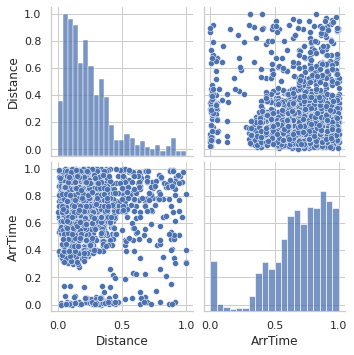

In [93]:
sns.pairplot(X_train[['Distance', 'ArrTime']])
plt.savefig("../reports/figures/X_train_MinMax_pairplot.png")

In [94]:
X_test.describe().round(3)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00,388.00
mean,0.45,0.50,0.50,0.65,0.51,0.69,0.70,0.59,0.25,0.29,0.27,0.15,0.45,0.49,0.22,0.13,0.15,0.00,0.04,0.02,0.04,0.00,0.07
std,0.31,0.29,0.32,0.18,0.24,0.22,0.19,0.31,0.18,0.20,0.20,0.13,0.27,0.28,0.19,0.10,0.14,0.00,0.08,0.07,0.08,0.05,0.10
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.18,0.23,0.17,0.52,0.32,0.57,0.57,0.32,0.11,0.13,0.12,0.08,0.25,0.27,0.08,0.07,0.07,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.46,0.48,0.50,0.66,0.50,0.73,0.70,0.68,0.20,0.23,0.21,0.11,0.44,0.48,0.17,0.12,0.11,0.00,0.04,0.00,0.04,0.00,0.07
75%,0.64,0.77,0.67,0.79,0.71,0.86,0.85,0.90,0.33,0.38,0.36,0.17,0.67,0.72,0.31,0.16,0.17,0.00,0.04,0.02,0.04,0.00,0.07
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00


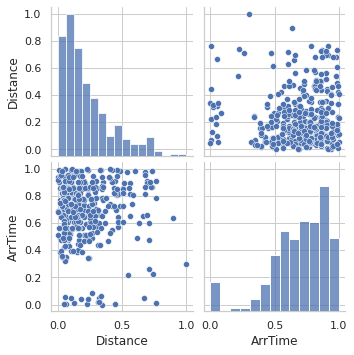

In [95]:
sns.pairplot(X_test[['Distance', 'ArrTime']])
plt.savefig("../reports/figures/X_test_MinMax_pairplot.png")

In [96]:
X_train.to_csv(path + "interim/X_train_MinMax.csv", index = False, header = True)
X_test.to_csv(path + "interim/X_test_MinMax.csv", index = False, header = True)

## Automomate fit and evaluate all the models with MinMax DataSet

In [97]:
# LazyRegressor Instance and fiting data

reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

modelsMinMax, predictionsMinMax = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:44<00:00,  1.06s/it]


- Models with MinMaxScaler

In [98]:
modelsMinMax.head(10)

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ElasticNet,0.88,0.89,19.13,0.03
KNeighborsRegressor,0.88,0.89,19.22,0.05
TweedieRegressor,0.87,0.88,20.48,0.03
GeneralizedLinearRegressor,0.87,0.88,20.48,0.07
MLPRegressor,0.79,0.80,26.05,1.54
KernelRidge,0.76,0.77,27.63,0.13
ElasticNetCV,0.74,0.76,28.46,0.22
DecisionTreeRegressor,0.72,0.74,29.79,0.05
ExtraTreeRegressor,0.72,0.73,29.99,0.04


- Visualization MinMax Models Predictions

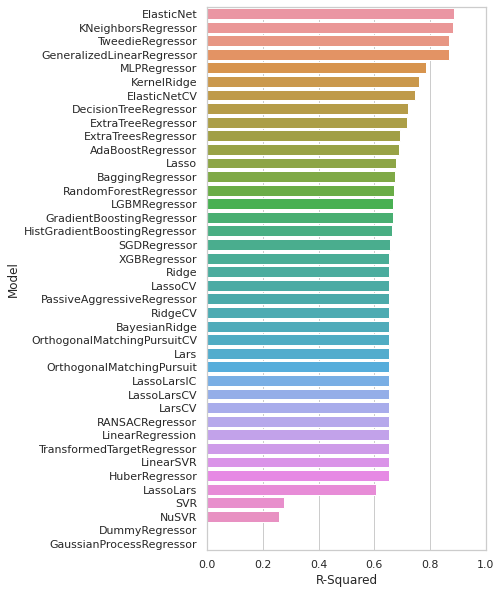

In [99]:
predictionsMinMax["R-Squared"] = [0 if i < 0 else i for i in predictionsMinMax.iloc[:,0] ]
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictionsMinMax.index, x="R-Squared", data=predictionsMinMax)
ax.set(xlim=(0, 1))
plt.savefig("../reports/figures/LazzyRegressor_MinMax_Models.png")

- Models With Standar Scaler

In [100]:
models.head(10)

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RANSACRegressor,1.00,1.00,0.00,0.04
LinearSVR,1.00,1.00,0.00,0.01
HuberRegressor,1.00,1.00,0.17,0.15
PassiveAggressiveRegressor,1.00,1.00,0.69,0.02
TransformedTargetRegressor,0.99,0.99,4.06,0.01
LinearRegression,0.99,0.99,4.06,0.01
Lars,0.99,0.99,4.06,0.02
BayesianRidge,0.99,0.99,4.06,0.03
Ridge,0.99,0.99,4.23,0.01


#### Using Min Max Scaler the results are worse compared to the Standard Scaler

## Models without DeepDelay Variable

In [101]:
df = pd.read_csv(path + 'processed/DelayedFlightsProcessed.csv')

In [102]:
# Matrix
X = df.drop(['ArrDelay','DepDelay'], axis = 'columns')
# Vector
y = df['ArrDelay']

In [103]:
# Call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 6858)

## Scaling

In [104]:
# Import script create for Standar Scaling
# ===============================================================================

import scaling

X_train, X_test = scaling.transform(X_train, X_test, X_train.columns)

## Automate fit and evaluate all the models without DeepDelay

In [105]:
# LazyRegressor Instance and fiting data

reg2 = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

models2, predictions2 = reg2.fit(X_train, X_test, y_train, y_test)


100%|██████████| 42/42 [00:07<00:00,  5.73it/s]


- Results with all variables

In [106]:
print(models.head(15))

                            Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                      
RANSACRegressor                           1.00       1.00  0.00        0.04
LinearSVR                                 1.00       1.00  0.00        0.01
HuberRegressor                            1.00       1.00  0.17        0.15
PassiveAggressiveRegressor                1.00       1.00  0.69        0.02
TransformedTargetRegressor                0.99       0.99  4.06        0.01
LinearRegression                          0.99       0.99  4.06        0.01
Lars                                      0.99       0.99  4.06        0.02
BayesianRidge                             0.99       0.99  4.06        0.03
Ridge                                     0.99       0.99  4.23        0.01
LassoLarsIC                               0.99       0.99  5.04        0.02
RidgeCV                                   0.99       0.99  5.47        0.04
SGDRegressor

- Results without Deepdelay variable

In [107]:
print(models2.head(15))

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
ExtraTreesRegressor                          0.97       0.98  9.04        0.63
GradientBoostingRegressor                    0.96       0.96 11.21        0.52
MLPRegressor                                 0.96       0.96 11.47        1.44
XGBRegressor                                 0.95       0.96 12.12        0.22
RandomForestRegressor                        0.92       0.92 16.08        1.51
DecisionTreeRegressor                        0.88       0.89 19.40        0.10
BaggingRegressor                             0.88       0.89 19.48        0.17
HistGradientBoostingRegressor                0.86       0.87 21.28        0.50
ExtraTreeRegressor                           0.86       0.87 21.28        0.02
LGBMRegressor                                0.85       0.86 21.81        0.16
Lars                                         0.78   

- Visualization Models Predictions without DepDelay

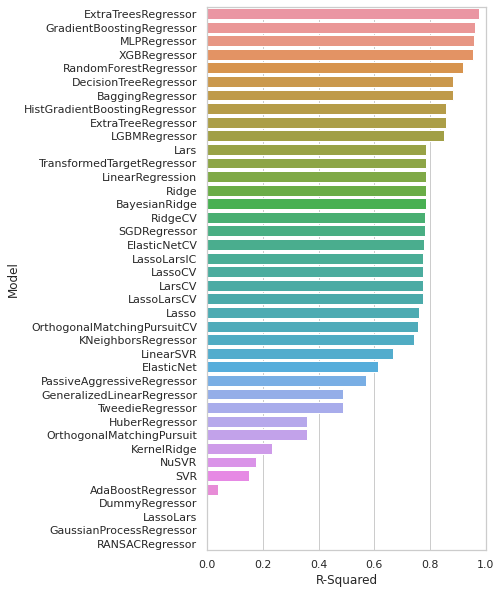

In [108]:
predictions2["R-Squared"] = [0 if i < 0 else i for i in predictions2.iloc[:,0] ]
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions2.index, x="R-Squared", data=predictions2)
ax.set(xlim=(0, 1))
plt.savefig("../reports/figures/LazzyRegressor_Models_without_DepDelay.png")

#### We can observe that when eliminating the variable DepDelay from the equation, the results change significantly, as it is a strongly correlated variable

## Huber Regressor

In [109]:
# random search linear regression model on the dataset


from sklearn.linear_model import HuberRegressor


# define model
model = HuberRegressor()
# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=6858)
# define search space
space = dict()
space['epsilon'] = loguniform(1e-5, 100)
space['alpha'] = loguniform(1e-5, 100)
space['warm_start'] = [True, False]
space['fit_intercept'] = [True, False]
space['tol'] = loguniform(1e-05, 100)
# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, random_state=6858)
# execute search
result = search.fit(X, y)
# summarize result
Huber_Best_Score2 = result.best_score_
print('Best Score: %s' % Huber_Best_Score2)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -17.434662917478153
Best Hyperparameters: {'alpha': 3.09209903587964, 'epsilon': 2.1866925110205155, 'fit_intercept': False, 'tol': 19.22856727777824, 'warm_start': False}


In [110]:
# Histogram-based HuberRegressor
hist = HuberRegressor()
hist.fit(X_train, y_train)
y_pred = hist.predict(X_test)

In [111]:
r2_Huber2, rmse_Huber2 = rmse(hist, y_test, y_pred, X_train, y_train)

In [112]:
print(r'R-Squared: ',r2_Huber2)
print(r'Mean Squared Error: ',rmse_Huber2)

R-Squared:  0.3972361735005012
Mean Squared Error:  45.03631106091955


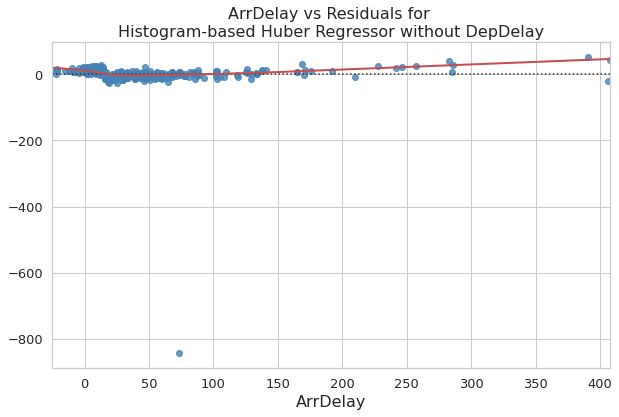

In [113]:
scatter_plot(y_test, y_pred, 'Histogram-based Huber Regressor without DepDelay')

## Lars

In [114]:
# random search Lars Regression model on the dataset

from sklearn.linear_model import Lars


# define model
model = Lars()
# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=6858)
# define search space
space = dict()
space['fit_intercept'] = [True, False]
space['verbose'] = [True, False]
space['normalize'] = [True, False]
space['precompute'] = [True, False]
space['n_nonzero_coefs'] = [500]
# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, random_state=6858)
# execute search
result = search.fit(X, y)
# summarize result
Lars_Best_Score2 = result.best_score_
print('Best Score: %s' % Lars_Best_Score)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -24.975432867973502
Best Hyperparameters: {'verbose': True, 'precompute': False, 'normalize': True, 'n_nonzero_coefs': 500, 'fit_intercept': True}


In [115]:
r2_Lars2, rmse_Lars2 = rmse(hist, y_test, y_pred, X_train, y_train)

In [116]:
print(r'R-Squared: ',r2_Lars2)
print(r'Mean Squared Error: ',rmse_Lars2)

R-Squared:  0.3972361735005012
Mean Squared Error:  45.03631106091955


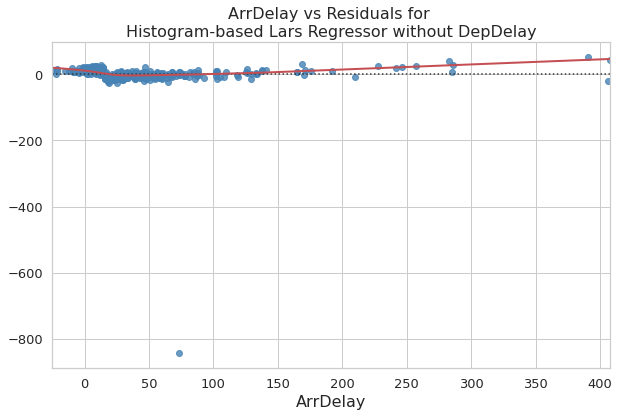

In [117]:
scatter_plot(y_test, y_pred, 'Histogram-based Lars Regressor without DepDelay')

## Ridge

In [118]:
# random search Ridge Regressormodel on the dataset

from sklearn.linear_model import Ridge

# define model
model = Ridge()
# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=6858)
# define search space
space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['alpha'] = loguniform(1e-5, 100)
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]
space['copy_X'] = [True, False]
space['max_iter'] = [None]
space['tol'] = [1e-3]
# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, random_state=6858)
# execute search
result = search.fit(X, y)
# summarize result
Ridge_Best_Score2 = result.best_score_
print('Best Score: %s' % Ridge_Best_Score2)
print('Best Hyperparameters: %s' % result.best_params_)

KeyboardInterrupt: 

In [ ]:
# Histogram-based Ridge Regressor
hist = Ridge()
hist.fit(X_train, y_train)
y_pred = hist.predict(X_test)

In [ ]:
r2_Ridge2, rmse_Ridge2 = rmse(hist, y_test, y_pred, X_train, y_train)

In [ ]:
print(r'R-Squared: ',r2_Ridge2)
print(r'Mean Squared Error: ',rmse_Ridge2)

In [ ]:
scatter_plot(y_test, y_pred, 'Histogram-based Ridge Regressor without DepDelay')

## OrthogonalMatchingPursuitCV

In [ ]:
# random search OrthogonalMatchingPursuitCV Regressormodel on the dataset

from sklearn.linear_model import OrthogonalMatchingPursuitCV


# define model
model = OrthogonalMatchingPursuitCV()
# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=6858)
# define search space
space = dict()
space['copy'] = [True, False]
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]
space['max_iter'] = [None]
# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, random_state=6858)
# execute search
result = search.fit(X, y)
# summarize result
Orthogonal_Best_Score2 = result.best_score_
print('Best Score: %s' % Orthogonal_Best_Score)
print('Best Hyperparameters: %s' % result.best_params_)

In [ ]:
# Histogram-based OrthogonalMatchingPursuitCV Regressor
hist = OrthogonalMatchingPursuitCV()
hist.fit(X_train, y_train)
y_pred = hist.predict(X_test)

In [ ]:
r2_Orthogonal2, rmse_Orthogonal2 = rmse(hist, y_test, y_pred, X_train, y_train)

In [ ]:
print(r'R-Squared: ',r2_Orthogonal2)
print(r'Mean Squared Error: ',rmse_Orthogonal2)

In [ ]:
scatter_plot(y_test, y_pred, 'Histogram-based Orthogonal Matching Pursuit Regressor without DepDelay')

In [ ]:
measure_eval2 = pd.DataFrame({'Measure': ['R2', 'RMSE', 'Best Score'], 
                             'Huber Regressor':[r2_Huber2, rmse_Huber2, Huber_Best_Score2],
                             'Lars': [r2_Lars2, rmse_Lars2, Lars_Best_Score2],
                             'Ridge': [r2_Ridge2, rmse_Ridge2, Ridge_Best_Score2], 
                             'Ortogonal': [r2_Orthogonal2, rmse_Orthogonal2, Orthogonal_Best_Score2]
                            })

### Summary without DepDelay variable

In [ ]:
measure_eval2

### Summary with all variable

In [ ]:
measure_eval